In [2]:
import numpy as np
from tensorflow.keras import optimizers,losses,metrics
from tensorflow.keras.datasets import imdb
from util.functions import vectorize_sequences
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

2021-07-17 19:29:42.321939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-17 19:29:42.321968: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

Because we are restricting pur self to the top 1000 most frequent words
no word index will exceed 10,000


In [3]:
# list max
max([max(sequence) for sequence in train_data])


9999

Decoding reviews


In [4]:
# TODO  convert me into a function

# first three places are useless crap
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
# vectorise the data
# Encoding the integer sequences into a binary matrix
x_train = vectorize_sequences(train_data,10000)
x_test = vectorize_sequences(test_data,10000)

print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### The model Definition


In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

2021-07-17 19:29:50.763667: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-17 19:29:50.850765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-17 19:29:50.851626: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 950M computeCapability: 5.0
coreClock: 1.124GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 29.83GiB/s
2021-07-17 19:29:50.851843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-17 19:29:50.852186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcu

In [8]:
# validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# train the model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

2021-07-17 19:29:51.554927: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-17 19:29:51.557622: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2599990000 Hz


Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5077 - acc: 0.7942 - val_loss: 0.3820 - val_acc: 0.8706
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3043 - acc: 0.9021 - val_loss: 0.3060 - val_acc: 0.8872
Epoch 3/20
30/30 [==============================] 

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting and training the validation accuracy


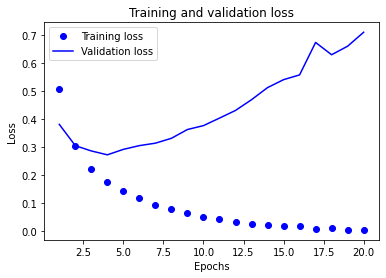

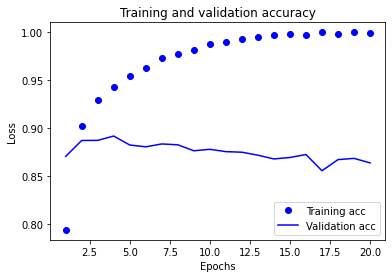

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history

# values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 933us/step - loss: 0.7856 - acc: 0.8478

2021-07-17 19:30:00.951301: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


[0.7855507135391235, 0.8478400111198425]

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

2021-07-17 19:30:02.457406: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.
2021-07-17 19:30:05.316661: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1000000000 exceeds 10% of free system memory.


Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4507 - accuracy: 0.8189
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2622 - accuracy: 0.9080

[0.29021576046943665, 0.8853600025177002]

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
7

dict_keys(['loss', 'accuracy'])